In [ ]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [ ]:
# Baca dataset dari Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Pilih lokasi file
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data_Pengguna_Spotify.csv')
print(dataset.head())

    User ID  Gender  Age  MonthlySubscription  PremiumUser
0  15146388  Female   21                45000            1
1  15825393  Female   18                30000            1
2  15200026    Male   50                15000            1
3  15917363  Female   59                50000            1
4  15069196  Female   44                30000            1


In [ ]:
# Pilih fitur dan target
print("Memisahkan fitur (X) dan target (y)")
X = dataset[['Age', 'MonthlySubscription']].values
y = dataset['PremiumUser'].values
print("Fitur (X):\n", X[:5])
print("Target (y):\n", y[:5])

Memisahkan fitur (X) dan target (y)
Fitur (X):
 [[   21 45000]
 [   18 30000]
 [   50 15000]
 [   59 50000]
 [   44 30000]]
Target (y):
 [1 1 1 1 1]


In [ ]:
# Bagi data menjadi train dan test
print("Membagi data menjadi training dan testing set")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")

Membagi data menjadi training dan testing set
Training data: (168, 2), Testing data: (56, 2)


In [ ]:
# Normalisasi Fitur
print("Melakukan standardisasi pada fitur")
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("Contoh data setelah scaling:\n", X_train[:5])

Melakukan standardisasi pada fitur
Contoh data setelah scaling:
 [[ 0.73603982  1.38990963]
 [ 0.40847773 -0.34941862]
 [ 1.30927348 -1.00166672]
 [-0.08286541  1.38990963]
 [-1.39311378  0.30282947]]


In [ ]:
# Training Model Naive Bayes
print("Melatih model Gaussian Naive Bayes")
classifier = GaussianNB()
classifier.fit(X_train, y_train)
print("Model berhasil dilatih.")

Melatih model Gaussian Naive Bayes
Model berhasil dilatih.


In [ ]:
# Prediksi dan Evaluasi
print("Melakukan prediksi pada data uji")
y_pred = classifier.predict(X_test)
print("Prediksi selesai.")

Melakukan prediksi pada data uji
Prediksi selesai.


In [ ]:
print("Menampilkan confusion matrix")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Menampilkan confusion matrix
Confusion Matrix:
 [[11  0]
 [ 0 45]]


Visualisasi hasil klasifikasi pada data training


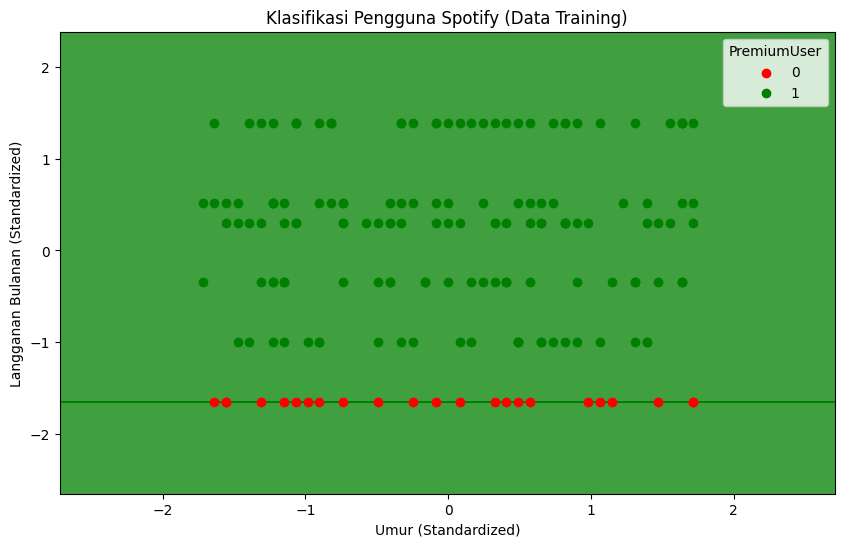

In [ ]:
# Visualisasi Data Training
print("Visualisasi hasil klasifikasi pada data training")
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))
plt.figure(figsize=(10,6))
plt.contourf(X1, X2,
             classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=[ListedColormap(('red', 'green'))(i)], label=j)
plt.title('Klasifikasi Pengguna Spotify (Data Training)')
plt.xlabel('Umur (Standardized)')
plt.ylabel('Langganan Bulanan (Standardized)')
plt.legend(title='PremiumUser')
plt.show()

Visualisasi hasil klasifikasi pada data uji


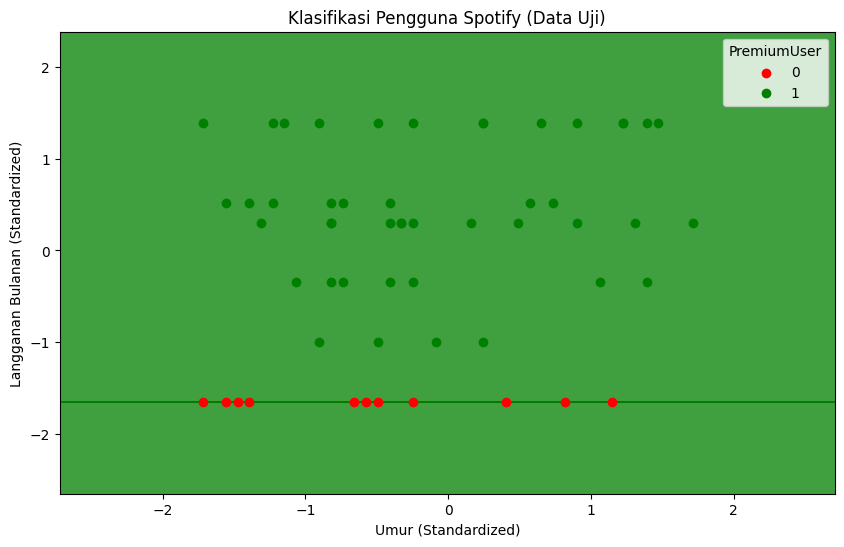

Proses selesai sepenuhnya.


In [ ]:

# Visualisasi Data Uji
print("Visualisasi hasil klasifikasi pada data uji")
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))
plt.figure(figsize=(10,6))
plt.contourf(X1, X2,
             classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=[ListedColormap(('red', 'green'))(i)], label=j)
plt.title('Klasifikasi Pengguna Spotify (Data Uji)')
plt.xlabel('Umur (Standardized)')
plt.ylabel('Langganan Bulanan (Standardized)')
plt.legend(title='PremiumUser')
plt.show()

print("Proses selesai sepenuhnya.")